## Exercise 4. Hemoglobin in trout

Hemoglobin is measured (g/100 ml.) in the blood of brown trout after 35 days of treatment with four rates of sulfamerazine: the daily rates of 0, 5, 10 and 15 g of sulfamerazine per 100 pounds of fish, denoted as rates 1, 2, 3 and 4, respectively. (Beware that the levels of the factor rate are coded by numbers.) Two methods (denoted as A and B) of administering the sulfamerazine were used. The data is collected in data set hemoglobin.txt

In [1]:
fish = read.table("hemoglobin.txt",header=TRUE)

### 4a)  Present an R-code for the randomization process to distribute 80 fishes over all combinations of levels of factors rate and method. --> ??

### 4b) Perform the two-way ANOVA to test for effects of factors rate, method and their interaction on the response variable hemoglobin. Comment on your findings.

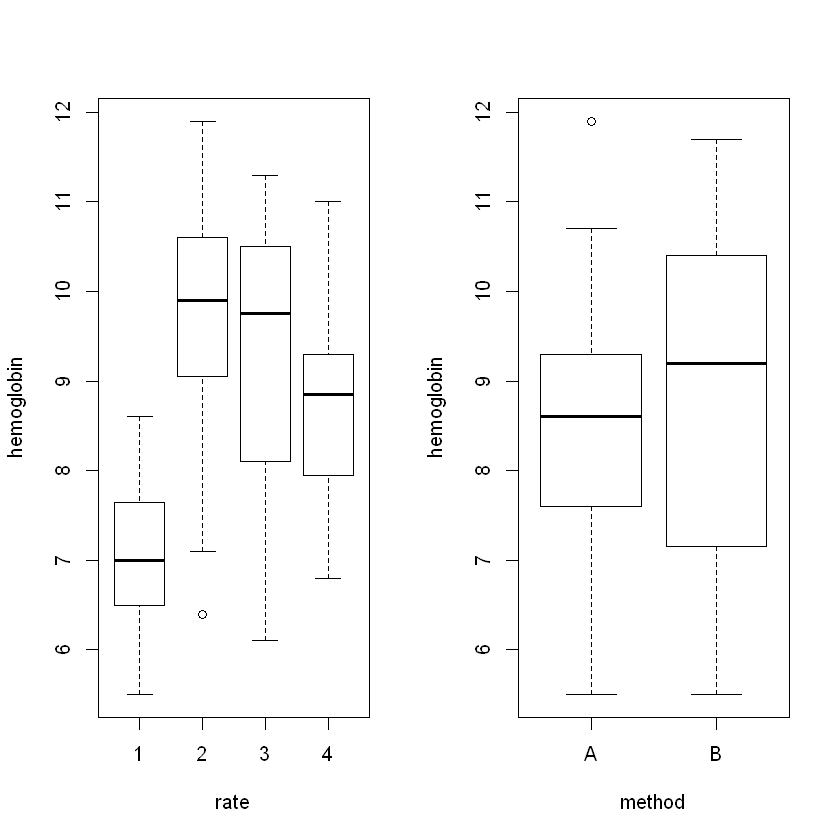

In [2]:
par(mfrow=c(1,2))
attach(fish)
boxplot(hemoglobin~rate); boxplot(hemoglobin~method)

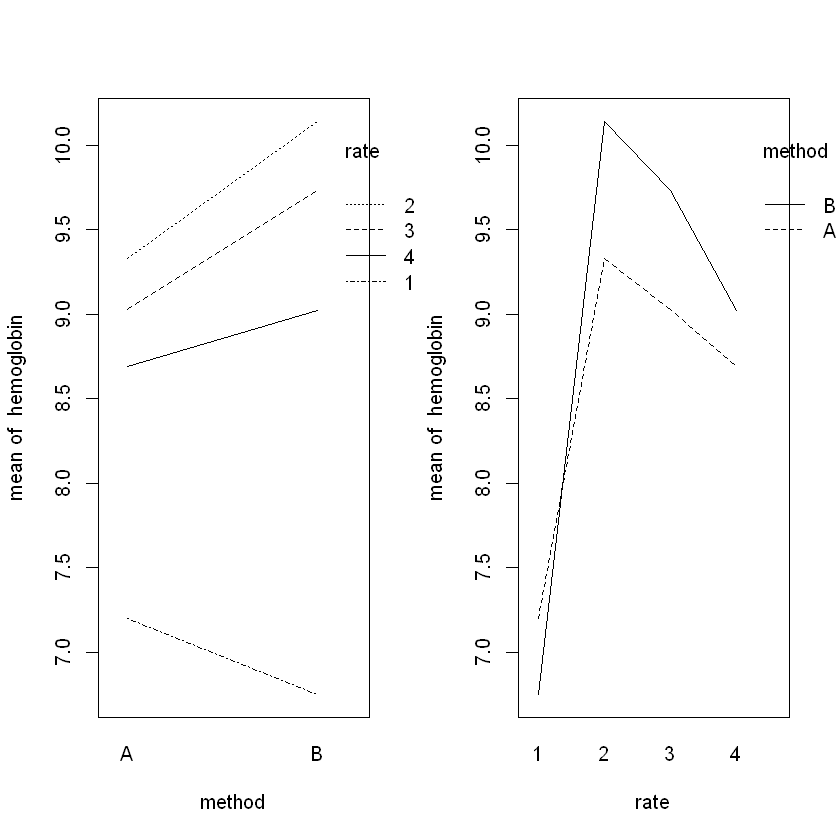

In [3]:
par(mfrow=c(1,2))
interaction.plot(method, rate, hemoglobin); interaction.plot(rate, method, hemoglobin)

Since rate is defined as a numerical variable it has to be converted to a factor variable

In [4]:
fish$rate = factor(fish$rate, 
                    levels = c(1,2,3,4),
                    labels = c('Rate1', 'Rate2', 'Rate3', 'Rate4'))

We assume that factors rate and method are independent for the first test

In [5]:
res.aov_dep = aov(hemoglobin ~ method * rate, data = fish)
summary(res.aov_dep)

            Df Sum Sq Mean Sq F value  Pr(>F)    
method       1   2.42   2.415   1.558   0.216    
rate         3  90.56  30.187  19.469 2.4e-09 ***
method:rate  3   4.87   1.624   1.047   0.377    
Residuals   72 111.64   1.551                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

From this test, we can conclude that the interaction of the method on the hemoglobin is not significant, but that the rate is significant on the amount of hemoglobin in the trout. This is based on the significance level α=0.05. Since the null hypothesis can be rejected based on this test, there is no need to test for the effects under the additive model.

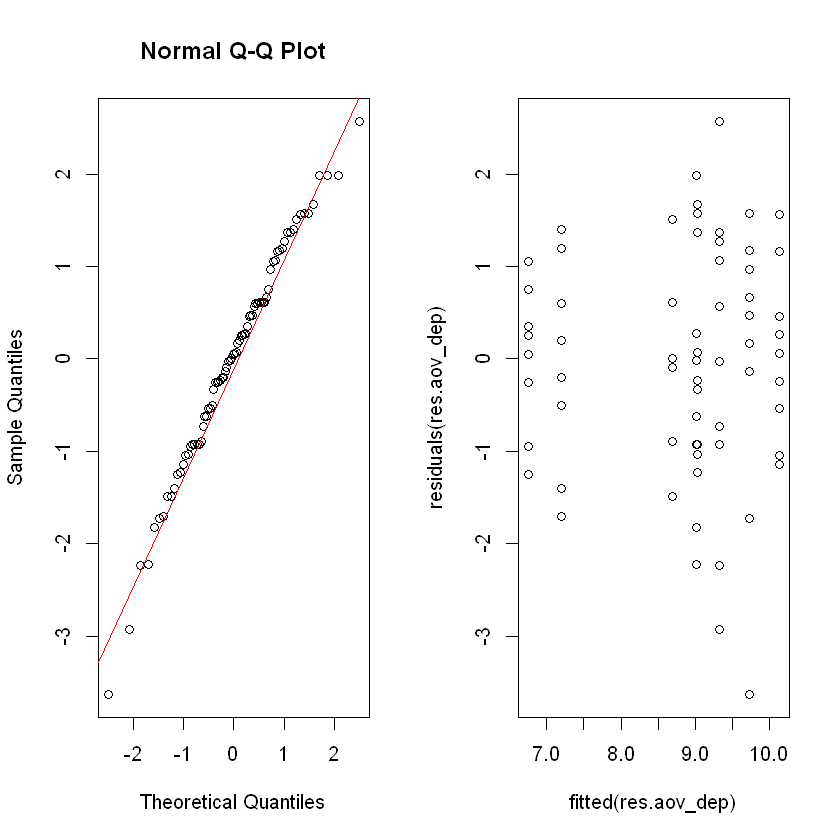

In [6]:
par(mfrow=c(1,2)); qqnorm(residuals(res.aov_dep)); qqline(residuals(res.aov_dep), col = 'red')
plot(fitted(res.aov_dep), residuals(res.aov_dep)); 

The normality of the left plot is clear, while the right plot seems to have a larger concentration and spread when the fitted values get above 9.

### 4c) Which of the two factors has the greatest influence? Is this a good question? Consider the additive model. Which combination of rate and method yield the highest hemoglobin? Estimate the mean hemoglobin value for rate 3 by using method A. What rate leads to the highest mean hemoglobin?

In [7]:
res.aov_ind = aov(hemoglobin ~ method + rate, data = fish)
summary(res.aov_ind)

            Df Sum Sq Mean Sq F value   Pr(>F)    
method       1   2.42   2.415   1.555    0.216    
rate         3  90.56  30.187  19.432 2.02e-09 ***
Residuals   75 116.51   1.553                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

To first address which of the factors has the greatest influence, since the interaction of rate on the hemoglobin values is the only factor that has a significant interaction with the hemoglobin we can conclude that the rate has the greatest influence.

This is also the case in the additive model seen above, where the method doesn't have a significant influence on the amount of hemoglobin.

#### good question??

In [8]:
fish[which.max(fish$hemoglobin),]

,hemoglobin,rate,method
31,11.9,Rate2,A


In [9]:
rate3_method_a = fish[fish$rate == 'Rate3' & fish$method == 'A', ]; mean(rate3_method_a$hemoglobin)

[1] 9.03

In [10]:
mean(fish[fish$rate == 'Rate1', ]$hemoglobin); 
mean(fish[fish$rate == 'Rate2', ]$hemoglobin); 
mean(fish[fish$rate == 'Rate3', ]$hemoglobin); 
mean(fish[fish$rate == 'Rate4', ]$hemoglobin)

[1] 6.975

[1] 9.735

[1] 9.38

[1] 8.855

By using Rate 2 and method A, the highest hemoglobin count can be achieved at 11.9. The mean hemoglobin value for rate 3 using method A is 9.03 and the highest mean hemoglobin can be achieved using Rate 2, at a value of 9.735.

### 4d) Test the null hypothesis that the hemoglobin is the same for all rates by a one-way ANOVA test, ignoring the variable method. Is it right/wrong or useful/not useful to perform this test on this dataset?

In [11]:
fish_no_method = subset(fish, select=c(hemoglobin, rate))

In [15]:
fish_no_methodaov=lm(hemoglobin~rate, data=fish_no_method);
anova(fish_no_methodaov)


Call:
lm(formula = hemoglobin ~ rate, data = fish_no_method)

Coefficients:
(Intercept)    rateRate2    rateRate3    rateRate4  
      6.975        2.760        2.405        1.880  


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
rate,3,90.56038,30.186792,19.2912,2.128803e-09
Residuals,76,118.92450,1.564796,NA,NA


Since the p-value is below 0.05, we can reject the null hypothesis, stating that hemoglobin is the same for all rates.

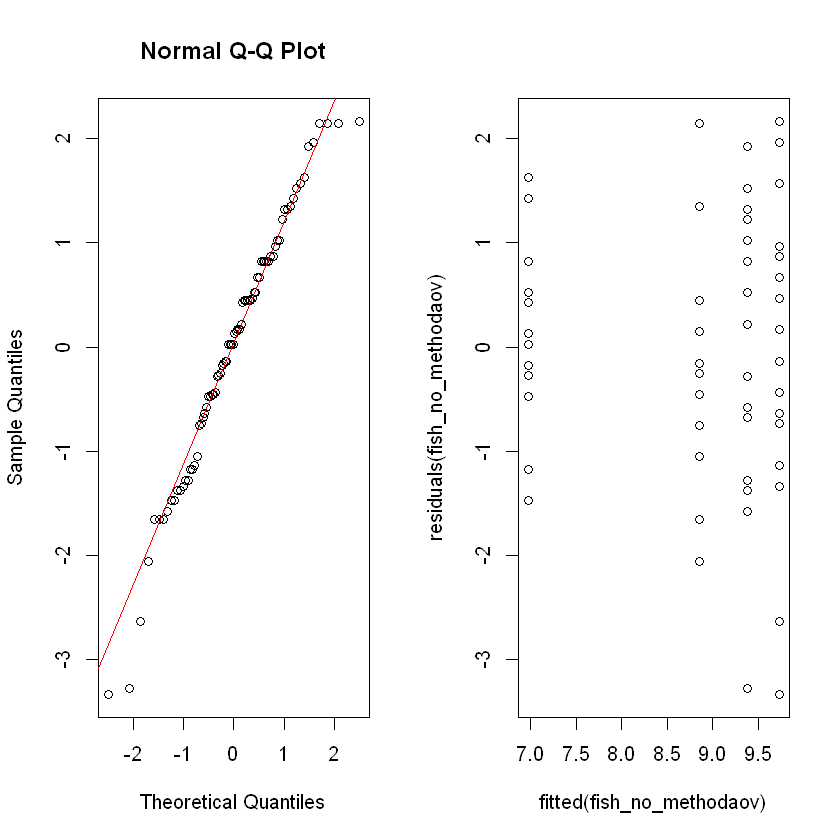

In [13]:
par(mfrow=c(1,2)); qqnorm(residuals(fish_no_methodaov)); qqline(residuals(fish_no_methodaov), col = 'red')
plot(fitted(fish_no_methodaov), residuals(fish_no_methodaov)); 

The qqplot shows normality, however, the value seen in the right plot has a heavy skew towards the right, implying non-normality

While the influence of method on hemoglobin was deemed insignificant, the little effect it might have had is now added onto the rates, this makes it somewhat of a wrong way to go about testing significance. However, it can be useful to have a more isolated view of the influence of the rates.